In [12]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


# 1:Blurring an Image

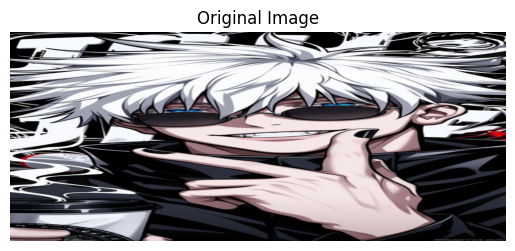

In [13]:
import cv2
from matplotlib import pyplot as plt

image_path = r'C:\Users\DELL\Desktop\web\Cute Wallpaper Hd 1080p.jpeg'
image = cv2.imread(image_path)
resized_image = cv2.resize(image, (1900, 800))
resized_image_rgb = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)
plt.imshow(resized_image_rgb)
plt.title('Original Image')
plt.axis('off')
plt.show()

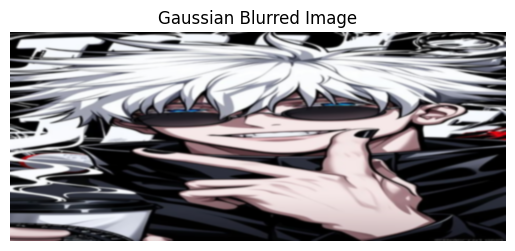

In [14]:
Gaussian = cv2.GaussianBlur(resized_image, (15, 15), 0)  
Gaussian_rgb = cv2.cvtColor(Gaussian, cv2.COLOR_BGR2RGB)  
plt.imshow(Gaussian_rgb)
plt.title('Gaussian Blurred Image')
plt.axis('off')
plt.show()

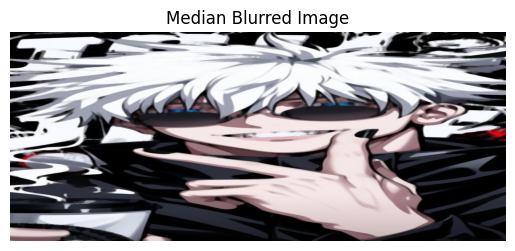

In [15]:
median = cv2.medianBlur(resized_image, 11)  
median_rgb = cv2.cvtColor(median, cv2.COLOR_BGR2RGB)  

plt.imshow(median_rgb)
plt.title('Median Blurred Image')
plt.axis('off')
plt.show()

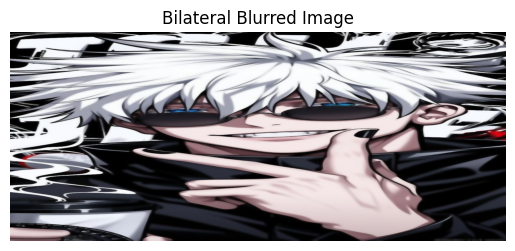

In [16]:
bilateral = cv2.bilateralFilter(resized_image, 15, 150, 150)  
bilateral_rgb = cv2.cvtColor(bilateral, cv2.COLOR_BGR2RGB)  

plt.imshow(bilateral_rgb)
plt.title('Bilateral Blurred Image')
plt.axis('off')
plt.show()

# 2:Grayscaling of Images

In [17]:
import cv2

image = cv2.imread(r'C:\Users\DELL\Desktop\web\Cute Wallpaper Hd 1080p.jpeg')

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

cv2.imshow('Grayscale', gray_image)
cv2.waitKey(0)  
cv2.destroyAllWindows()

In [18]:
import cv2

img = cv2.imread(r'C:\Users\DELL\Desktop\web\Cute Wallpaper Hd 1080p.jpeg', 0)

cv2.imshow('Grayscale Image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [19]:
import cv2

img_weighted = cv2.imread(r'C:\Users\DELL\Desktop\web\Cute Wallpaper Hd 1080p.jpeg')
rows, cols = img_weighted.shape[:2]

for i in range(rows):
    for j in range(cols):
        gray = 0.2989 * img_weighted[i, j][2] + 0.5870 * img_weighted[i, j][1] + 0.1140 * img_weighted[i, j][0]
        img_weighted[i, j] = [gray, gray, gray]

cv2.imshow('Grayscale Image (Weighted)', img_weighted)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [20]:
import cv2

img = cv2.imread(r'C:\Users\DELL\Desktop\web\Cute Wallpaper Hd 1080p.jpeg')
rows, cols = img.shape[:2]

for i in range(rows):
    for j in range(cols):
        gray = (img[i, j, 0] + img[i, j, 1] + img[i, j, 2]) / 3
        img[i, j] = [gray, gray, gray]

cv2.imshow('Grayscale Image (Average)', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

C:\Users\DELL\AppData\Local\Temp\ipykernel_24308\3152541128.py:8: RuntimeWarning: overflow encountered in scalar add
  gray = (img[i, j, 0] + img[i, j, 1] + img[i, j, 2]) / 3


# 3:Scaling, Rotating, Shifting and Edge Detection

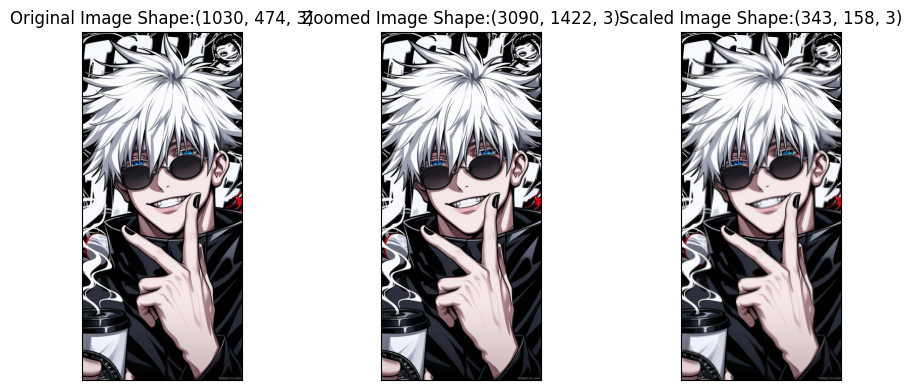

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread(r'C:\Users\DELL\Desktop\web\Cute Wallpaper Hd 1080p.jpeg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
scale_factor_1 = 3.0  
scale_factor_2 = 1/3.0
height, width = image_rgb.shape[:2]
new_height = int(height * scale_factor_1)
new_width = int(width * scale_factor_1)

zoomed_image = cv2.resize(src =image_rgb, 
                          dsize=(new_width, new_height), 
                          interpolation=cv2.INTER_CUBIC)
                          
new_height1 = int(height * scale_factor_2)
new_width1 = int(width * scale_factor_2)
scaled_image = cv2.resize(src= image_rgb, 
                          dsize =(new_width1, new_height1), 
                          interpolation=cv2.INTER_AREA)

fig, axs = plt.subplots(1, 3, figsize=(10, 4))
axs[0].imshow(image_rgb)
axs[0].set_title('Original Image Shape:'+str(image_rgb.shape))
axs[1].imshow(zoomed_image)
axs[1].set_title('Zoomed Image Shape:'+str(zoomed_image.shape))
axs[2].imshow(scaled_image)
axs[2].set_title('Scaled Image Shape:'+str(scaled_image.shape))

for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

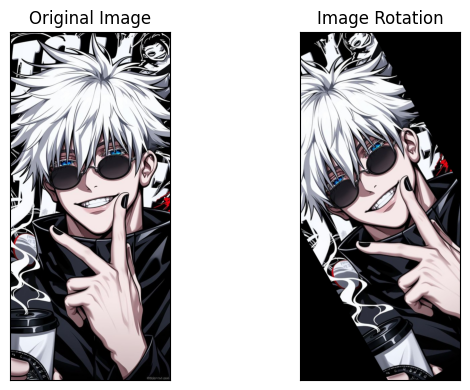

In [22]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread(r'C:\Users\DELL\Desktop\web\Cute Wallpaper Hd 1080p.jpeg')
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
center = (image_rgb.shape[1] // 2, image_rgb.shape[0] // 2)
angle = 30
scale = 1
rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale)
rotated_image = cv2.warpAffine(image_rgb, rotation_matrix, (img.shape[1], img.shape[0]))

fig, axs = plt.subplots(1, 2, figsize=(7, 4))
axs[0].imshow(image_rgb)
axs[0].set_title('Original Image')
axs[1].imshow(rotated_image)
axs[1].set_title('Image Rotation')
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])
    
plt.tight_layout()
plt.show()

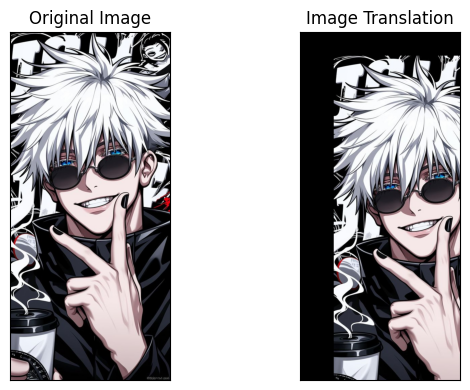

In [23]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread(r'C:\Users\DELL\Desktop\web\Cute Wallpaper Hd 1080p.jpeg')
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
width, height = image_rgb.shape[1], image_rgb.shape[0]

tx, ty = 100, 70
translation_matrix = np.array([[1, 0, tx], [0, 1, ty]], dtype=np.float32)
translated_image = cv2.warpAffine(image_rgb, translation_matrix, (width, height))

fig, axs = plt.subplots(1, 2, figsize=(7, 4))
axs[0].imshow(image_rgb), axs[0].set_title('Original Image')
axs[1].imshow(translated_image), axs[1].set_title('Image Translation')

for ax in axs:
    ax.set_xticks([]), ax.set_yticks([])

plt.tight_layout()
plt.show()

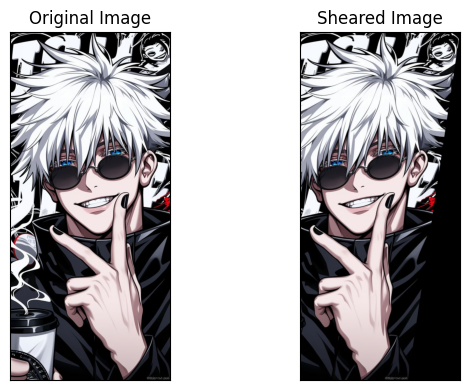

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread(r'C:\Users\DELL\Desktop\web\Cute Wallpaper Hd 1080p.jpeg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
width, height = image_rgb.shape[1], image_rgb.shape[0]

shearX, shearY = -0.15, 0
transformation_matrix = np.array([[1, shearX, 0], [0, 1, shearY]], dtype=np.float32)
sheared_image = cv2.warpAffine(image_rgb, transformation_matrix, (width, height))

fig, axs = plt.subplots(1, 2, figsize=(7, 4))
axs[0].imshow(image_rgb), axs[0].set_title('Original Image')
axs[1].imshow(sheared_image), axs[1].set_title('Sheared Image')

for ax in axs:
    ax.set_xticks([]), ax.set_yticks([])

plt.tight_layout()
plt.show()

[[0.01568627 0.01176471 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.00784314 ... 0.         0.         0.        ]
 ...
 [0.50588235 0.48235294 0.4627451  ... 0.         0.0627451  0.1254902 ]
 [0.62352941 0.60392157 0.55686275 ... 0.00392157 0.04313725 0.08235294]
 [0.90196078 0.91764706 0.8627451  ... 0.07058824 0.01568627 0.03529412]]


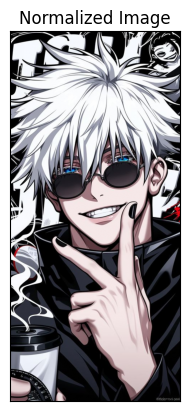

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread(r'C:\Users\DELL\Desktop\web\Cute Wallpaper Hd 1080p.jpeg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
b, g, r = cv2.split(image_rgb)

b_normalized = cv2.normalize(b.astype('float'), None, 0, 1, cv2.NORM_MINMAX)
g_normalized = cv2.normalize(g.astype('float'), None, 0, 1, cv2.NORM_MINMAX)
r_normalized = cv2.normalize(r.astype('float'), None, 0, 1, cv2.NORM_MINMAX)

normalized_image = cv2.merge((b_normalized, g_normalized, r_normalized))
print(normalized_image[:, :, 0])

plt.imshow(normalized_image)
plt.xticks([]), 
plt.yticks([]), 
plt.title('Normalized Image')
plt.show()

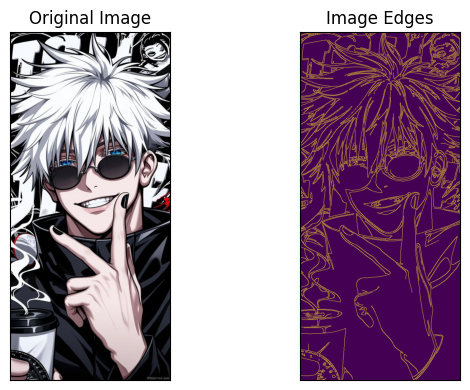

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread(r'C:\Users\DELL\Desktop\web\Cute Wallpaper Hd 1080p.jpeg')
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
edges = cv2.Canny(image_rgb, 100, 700)

fig, axs = plt.subplots(1, 2, figsize=(7, 4))
axs[0].imshow(image_rgb), axs[0].set_title('Original Image')
axs[1].imshow(edges), axs[1].set_title('Image Edges')

for ax in axs:
    ax.set_xticks([]), ax.set_yticks([])

plt.tight_layout()
plt.show()

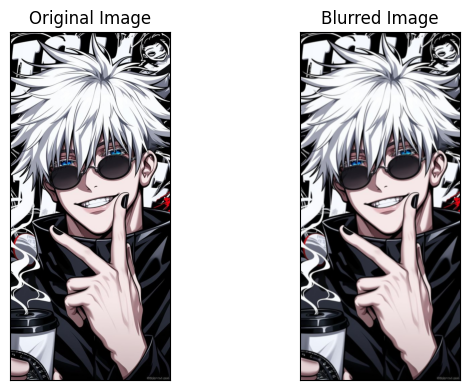

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread(r'C:\Users\DELL\Desktop\web\Cute Wallpaper Hd 1080p.jpeg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
blurred = cv2.GaussianBlur(image, (3, 3), 0)
blurred_rgb = cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB)

fig, axs = plt.subplots(1, 2, figsize=(7, 4))
axs[0].imshow(image_rgb), axs[0].set_title('Original Image')
axs[1].imshow(blurred_rgb), axs[1].set_title('Blurred Image')

for ax in axs:
    ax.set_xticks([]), ax.set_yticks([])

plt.tight_layout()
plt.show()

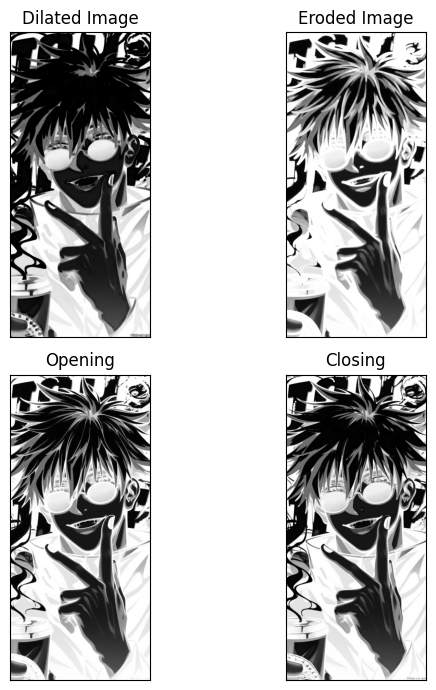

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread(r'C:\Users\DELL\Desktop\web\Cute Wallpaper Hd 1080p.jpeg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
kernel = np.ones((3, 3), np.uint8)

dilated = cv2.dilate(image_gray, kernel, iterations=2)
eroded = cv2.erode(image_gray, kernel, iterations=2)
opening = cv2.morphologyEx(image_gray, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(image_gray, cv2.MORPH_CLOSE, kernel)

fig, axs = plt.subplots(2, 2, figsize=(7, 7))
axs[0, 0].imshow(dilated, cmap='Greys'), axs[0, 0].set_title('Dilated Image')
axs[0, 1].imshow(eroded, cmap='Greys'), axs[0, 1].set_title('Eroded Image')
axs[1, 0].imshow(opening, cmap='Greys'), axs[1, 0].set_title('Opening')
axs[1, 1].imshow(closing, cmap='Greys'), axs[1, 1].set_title('Closing')

for ax in axs.flatten():
    ax.set_xticks([]), ax.set_yticks([])

plt.tight_layout()
plt.show()

# 4:Intensity Transformation Operations on Images

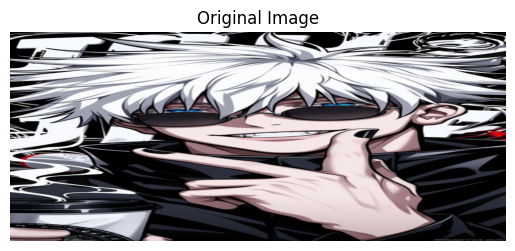

In [29]:
import cv2
from matplotlib import pyplot as plt

image_path = r'C:\Users\DELL\Desktop\web\Cute Wallpaper Hd 1080p.jpeg'
image = cv2.imread(image_path)
resized_image = cv2.resize(image, (1900, 800))
resized_image_rgb = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)
plt.imshow(resized_image_rgb)
plt.title('Original Image')
plt.axis('off')
plt.show()

In [30]:
import cv2
import numpy as np

# Open the image.
img = cv2.imread(r'C:\Users\DELL\Desktop\web\Cute Wallpaper Hd 1080p.jpeg')

# Apply log transform.
c = 255/(np.log(1 + np.max(img)))
log_transformed = c * np.log(1 + img)

# Specify the data type.
log_transformed = np.array(log_transformed, dtype = np.uint8)

# Save the output.
cv2.imwrite('log_transformed.jpg', log_transformed)

C:\Users\DELL\AppData\Local\Temp\ipykernel_24308\1903885085.py:8: RuntimeWarning: overflow encountered in scalar add
  c = 255/(np.log(1 + np.max(img)))
C:\Users\DELL\AppData\Local\Temp\ipykernel_24308\1903885085.py:8: RuntimeWarning: divide by zero encountered in log
  c = 255/(np.log(1 + np.max(img)))
C:\Users\DELL\AppData\Local\Temp\ipykernel_24308\1903885085.py:9: RuntimeWarning: divide by zero encountered in log
  log_transformed = c * np.log(1 + img)
C:\Users\DELL\AppData\Local\Temp\ipykernel_24308\1903885085.py:9: RuntimeWarning: invalid value encountered in multiply
  log_transformed = c * np.log(1 + img)
C:\Users\DELL\AppData\Local\Temp\ipykernel_24308\1903885085.py:12: RuntimeWarning: invalid value encountered in cast
  log_transformed = np.array(log_transformed, dtype = np.uint8)


True

In [33]:
import cv2
import numpy as np

# Open the image.
img = cv2.imread(r'C:\Users\DELL\Desktop\web\Cute Wallpaper Hd 1080p.jpeg')

# Trying 4 gamma values.
for gamma in [0.1, 0.5, 1.2, 2.2]:
    
    # Apply gamma correction.
    gamma_corrected = np.array(255*(img / 255) ** gamma, dtype = 'uint8')

    # Save edited images.
    cv2.imwrite('gamma_transformed'+str(gamma)+'.jpg', gamma_corrected)

In [34]:
import cv2
import numpy as np

# Function to map each intensity level to output intensity level.
def pixelVal(pix, r1, s1, r2, s2):
    if (0 <= pix and pix <= r1):
        return (s1 / r1)*pix
    elif (r1 < pix and pix <= r2):
        return ((s2 - s1)/(r2 - r1)) * (pix - r1) + s1
    else:
        return ((255 - s2)/(255 - r2)) * (pix - r2) + s2

# Open the image.
img = cv2.imread(r'C:\Users\DELL\Desktop\web\Cute Wallpaper Hd 1080p.jpeg')

# Define parameters.
r1 = 70
s1 = 0
r2 = 140
s2 = 255

# Vectorize the function to apply it to each value in the Numpy array.
pixelVal_vec = np.vectorize(pixelVal)

# Apply contrast stretching.
contrast_stretched = pixelVal_vec(img, r1, s1, r2, s2)

# Save edited image.
cv2.imwrite('contrast_stretch.jpg', contrast_stretched)

True

# 5:Image Translation

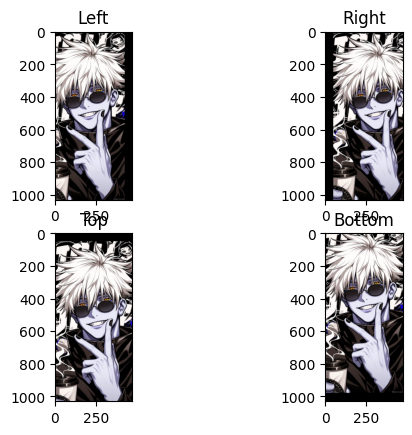

In [35]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread(r'C:\Users\DELL\Desktop\web\Cute Wallpaper Hd 1080p.jpeg')
rows, cols, _ = img.shape

M_left = np.float32([[1, 0, -50], [0, 1, 0]])
M_right = np.float32([[1, 0, 50], [0, 1, 0]])
M_top = np.float32([[1, 0, 0], [0, 1, 50]])
M_bottom = np.float32([[1, 0, 0], [0, 1, -50]])

img_left = cv2.warpAffine(img, M_left, (cols, rows))
img_right = cv2.warpAffine(img, M_right, (cols, rows))
img_top = cv2.warpAffine(img, M_top, (cols, rows))
img_bottom = cv2.warpAffine(img, M_bottom, (cols, rows))

plt.subplot(221), plt.imshow(img_left), plt.title('Left')
plt.subplot(222), plt.imshow(img_right), plt.title('Right')
plt.subplot(223), plt.imshow(img_top), plt.title('Top')
plt.subplot(224), plt.imshow(img_bottom), plt.title('Bottom')
plt.show()

# 6:Image Pyramid

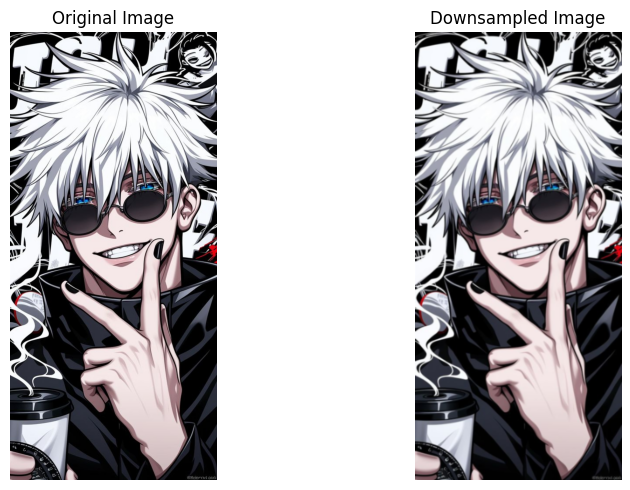

In [40]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread(r'C:\Users\DELL\Desktop\web\Cute Wallpaper Hd 1080p.jpeg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

downsampled_image = cv2.pyrDown(image)
downsampled_rgb = cv2.cvtColor(downsampled_image, cv2.COLOR_BGR2RGB)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(image_rgb)
axs[0].set_title('Original Image')
axs[0].axis('off')
axs[1].imshow(downsampled_rgb)
axs[1].set_title('Downsampled Image')
axs[1].axis('off')
plt.tight_layout()
plt.show()

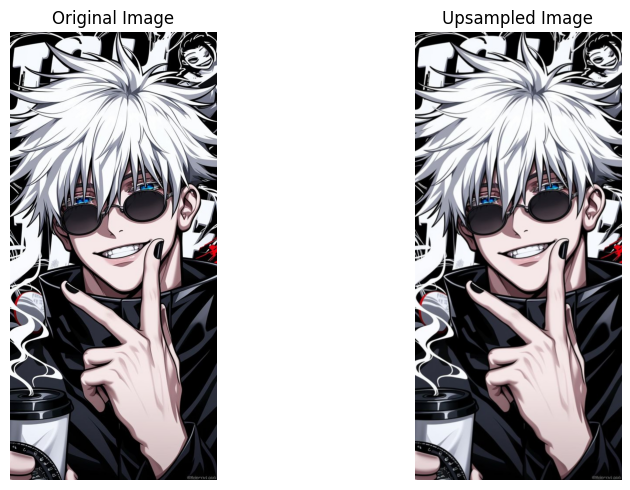

In [41]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread(r'C:\Users\DELL\Desktop\web\Cute Wallpaper Hd 1080p.jpeg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

upsampled_image = cv2.pyrUp(image)
upsampled_rgb = cv2.cvtColor(upsampled_image, cv2.COLOR_BGR2RGB)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(image_rgb)
axs[0].set_title('Original Image')
axs[0].axis('off')
axs[1].imshow(upsampled_rgb)
axs[1].set_title('Upsampled Image')
axs[1].axis('off')
plt.tight_layout()
plt.show()

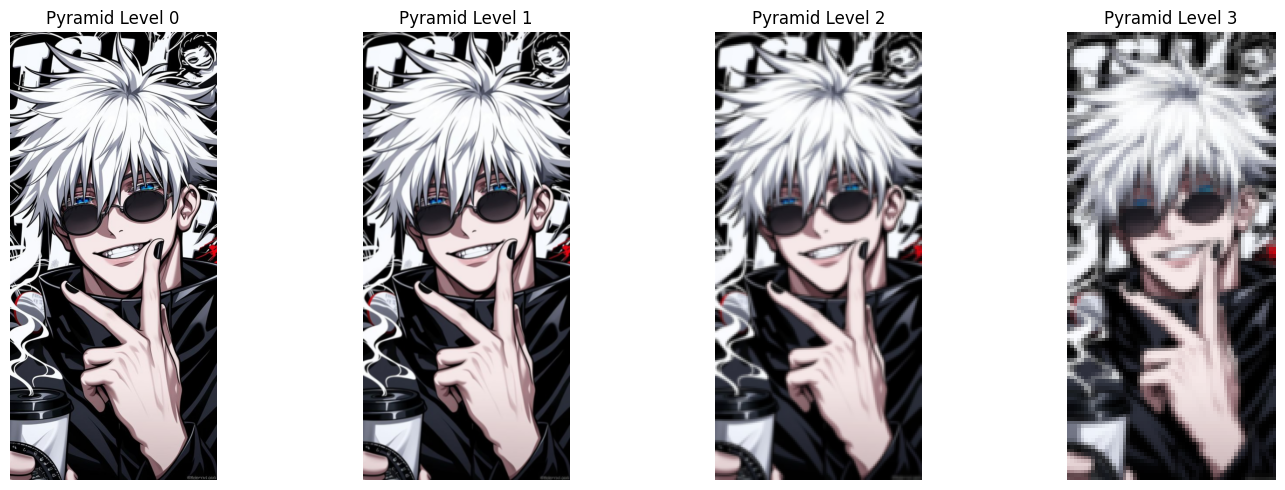

In [42]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread(r'C:\Users\DELL\Desktop\web\Cute Wallpaper Hd 1080p.jpeg')

pyramid = [image]

for i in range(3): 
    image = cv2.pyrDown(image)
    pyramid.append(image)

fig, axs = plt.subplots(1, 4, figsize=(15, 5))
for i in range(len(pyramid)):
    pyramid_rgb = cv2.cvtColor(pyramid[i], cv2.COLOR_BGR2RGB)
    axs[i].imshow(pyramid_rgb)
    axs[i].set_title(f'Pyramid Level {i}')
    axs[i].axis('off')
plt.tight_layout()
plt.show()

# 7:Histograms Equalization

In [45]:
img = cv2.imread(r'C:\Users\DELL\Desktop\web\Cute Wallpaper Hd 1080p.jpeg', 0)  
equ = cv2.equalizeHist(img)
res = np.hstack((img, equ))

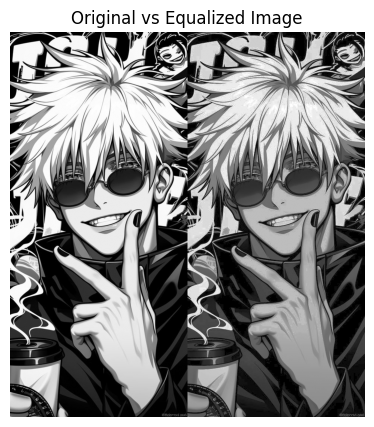

In [46]:
plt.figure(figsize=(10, 5))
plt.imshow(res, cmap='gray')  
plt.title("Original vs Equalized Image")
plt.axis('off')  
plt.show()

# 8:Convert an image from one color space to another

In [47]:
import cv2
src = cv2.imread(r'C:\Users\DELL\Desktop\web\Cute Wallpaper Hd 1080p.jpeg')  # Read the image

# Convert to Grayscale
gray_image = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

# Display
cv2.imshow("Grayscale Image", gray_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [48]:
import cv2
src = cv2.imread(r'C:\Users\DELL\Desktop\web\Cute Wallpaper Hd 1080p.jpeg')

# Convert to HSV
hsv_image = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

cv2.imshow("HSV Image", hsv_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

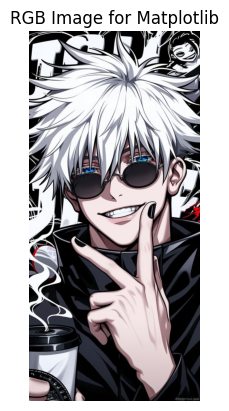

In [49]:
import cv2
import matplotlib.pyplot as plt
src = cv2.imread(r'C:\Users\DELL\Desktop\web\Cute Wallpaper Hd 1080p.jpeg')

# Convert from BGR to RGB
rgb_image = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)

# Display with Matplotlib
plt.imshow(rgb_image)
plt.title("RGB Image for Matplotlib")
plt.axis('off')
plt.show()

# 9:Visualizing image in different color spaces

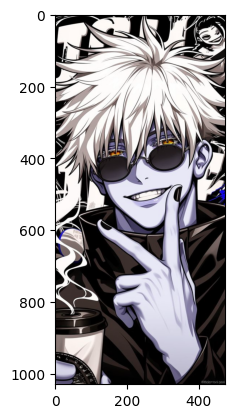

In [50]:
# Python program to read image as RGB

# Importing cv2 and matplotlib module
import cv2
import matplotlib.pyplot as plt

# reads image as RGB
img = cv2.imread(r'C:\Users\DELL\Desktop\web\Cute Wallpaper Hd 1080p.jpeg')

# shows the image
plt.imshow(img)

In [52]:
# Python program to read image
# as HSV color space

# Importing cv2 module
import cv2

# Reads the image
img = cv2.imread(r'C:\Users\DELL\Desktop\web\Cute Wallpaper Hd 1080p.jpeg')

# Converts to HSV color space
img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Shows the image
cv2.imshow('image', img) 

cv2.waitKey(0)         
cv2.destroyAllWindows()

In [53]:
# Python program to read image
# as LAB color space

# Importing cv2 module
import cv2

# Reads the image
img = cv2.imread(r'C:\Users\DELL\Desktop\web\Cute Wallpaper Hd 1080p.jpeg')

# Converts to LAB color space
img = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

# Shows the image
cv2.imshow('image', img) 

cv2.waitKey(0)         
cv2.destroyAllWindows()

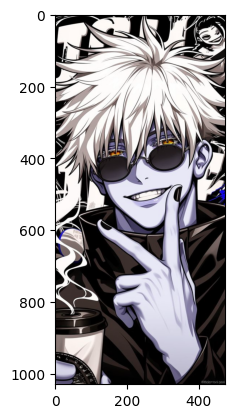

In [54]:
# Python program to visualize 
# Heat map of image

# Importing matplotlib and cv2
import matplotlib.pyplot as plt
import cv2

# reads the image
img = cv2.imread(r'C:\Users\DELL\Desktop\web\Cute Wallpaper Hd 1080p.jpeg')

# plot heat map image
plt.imshow(img, cmap ='hot')

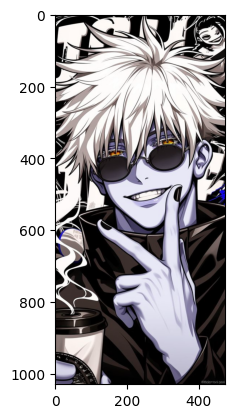

In [55]:
# Python program to visualize 
# Spectral map of image

# Importing matplotlib and cv2
import matplotlib.pyplot as plt
import cv2

img = cv2.imread(r'C:\Users\DELL\Desktop\web\Cute Wallpaper Hd 1080p.jpeg')
plt.imshow(img, cmap ='nipy_spectral')

# 10:Create Border around Images

In [56]:
import cv2

image = cv2.imread(r'C:\Users\DELL\Desktop\web\Cute Wallpaper Hd 1080p.jpeg')
image = cv2.copyMakeBorder( image, 10, 10, 10, 10, cv2.BORDER_CONSTANT, value=(0, 0, 0))

cv2.imshow("Bordered Image", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [57]:
import cv2

image = cv2.imread(r'C:\Users\DELL\Desktop\web\Cute Wallpaper Hd 1080p.jpeg')

border_reflect = cv2.copyMakeBorder(image, 50, 50, 50, 50, cv2.BORDER_REFLECT)
border_reflect_101 = cv2.copyMakeBorder(image, 50, 50, 50, 50, cv2.BORDER_REFLECT_101)
border_replicate = cv2.copyMakeBorder(image, 50, 50, 50, 50, cv2.BORDER_REPLICATE)

cv2.imshow("Border Reflect", border_reflect)
cv2.imshow("Border Reflect 101", border_reflect_101)
cv2.imshow("Border Replicate", border_replicate)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [58]:
import cv2

image = cv2.imread(r'C:\Users\DELL\Desktop\web\Cute Wallpaper Hd 1080p.jpeg')
bordered_image = cv2.copyMakeBorder(image, 10, 10, 10, 10, cv2.BORDER_CONSTANT, value=(0, 0, 255))

cv2.imshow("Red Border Image", bordered_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 11:Simple Thresholding

In [59]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread(r'C:\Users\DELL\Desktop\web\Cute Wallpaper Hd 1080p.jpeg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [60]:
def show_image(img, title):
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

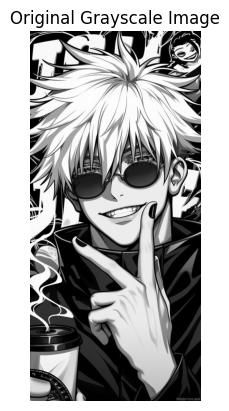

In [61]:
show_image(gray_image, 'Original Grayscale Image')

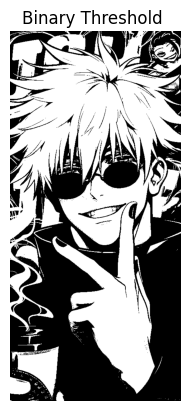

In [62]:
_, thresh_binary = cv2.threshold(gray_image, 120, 255, cv2.THRESH_BINARY)
show_image(thresh_binary, 'Binary Threshold ')

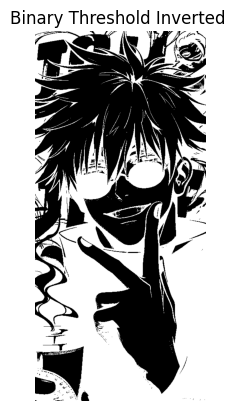

In [63]:
_, thresh_binary_inv = cv2.threshold(
    gray_image, 120, 255, cv2.THRESH_BINARY_INV)
show_image(thresh_binary_inv, 'Binary Threshold Inverted ')

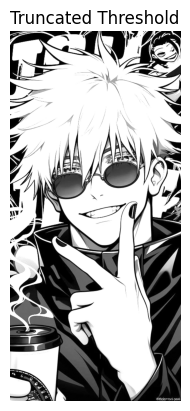

In [64]:
_, thresh_trunc = cv2.threshold(gray_image, 120, 255, cv2.THRESH_TRUNC)
show_image(thresh_trunc, 'Truncated Threshold')

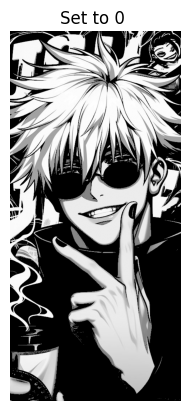

In [65]:
_, thresh_tozero = cv2.threshold(gray_image, 120, 255, cv2.THRESH_TOZERO)
show_image(thresh_tozero, 'Set to 0 ')

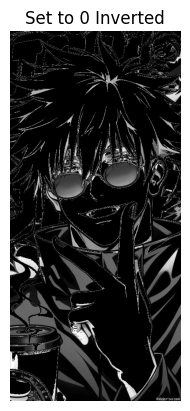

In [66]:
_, thresh_tozero_inv = cv2.threshold(
    gray_image, 120, 255, cv2.THRESH_TOZERO_INV)
show_image(thresh_tozero_inv, 'Set to 0 Inverted')

# 12:Adaptive Thresholding

In [67]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread(r'C:\Users\DELL\Desktop\web\Cute Wallpaper Hd 1080p.jpeg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [68]:
def show_image(img, title):
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

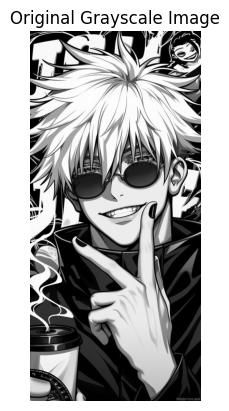

In [69]:
show_image(gray_image, "Original Grayscale Image")

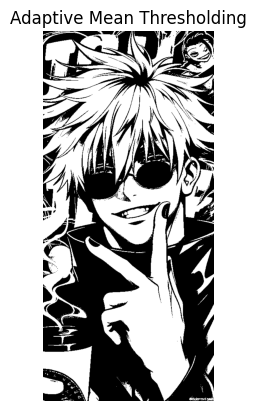

In [70]:
thresh_mean = cv2.adaptiveThreshold(
    gray_image, 255,
    cv2.ADAPTIVE_THRESH_MEAN_C,
    cv2.THRESH_BINARY,
    199, 5
)
show_image(thresh_mean, "Adaptive Mean Thresholding")

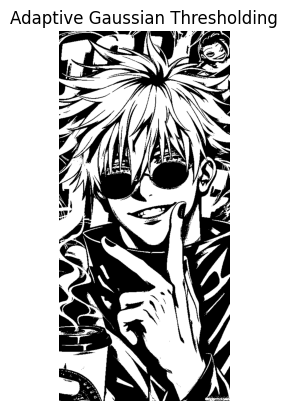

In [71]:
thresh_gauss = cv2.adaptiveThreshold(
    gray_image, 255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY,
    199, 5
)
show_image(thresh_gauss, "Adaptive Gaussian Thresholding")

# 13:Erosion and Dilation of images

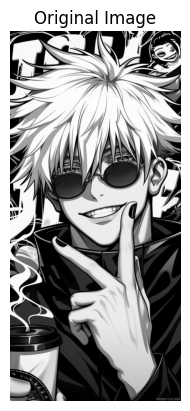

In [72]:
img = cv2.imread(r'C:\Users\DELL\Desktop\web\Cute Wallpaper Hd 1080p.jpeg', 0)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()
kernel = np.ones((5, 5), np.uint8)

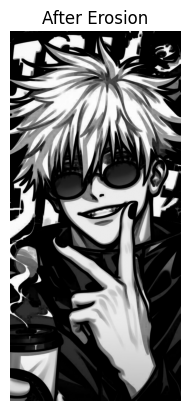

In [73]:
img_erosion = cv2.erode(img, kernel, iterations=1)

plt.imshow(img_erosion, cmap='gray')
plt.title("After Erosion")
plt.axis('off')
plt.show()

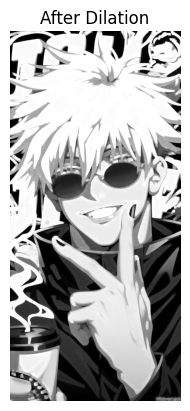

In [74]:
img_dilation = cv2.dilate(img, kernel, iterations=1)

plt.imshow(img_dilation, cmap='gray')
plt.title("After Dilation")
plt.axis('off')
plt.show()

# 14:Bilateral Filtering

In [75]:
import cv2

# Read the image.
img = cv2.imread(r'C:\Users\DELL\Desktop\web\Cute Wallpaper Hd 1080p.jpeg')

# Apply bilateral filter with d = 15, 
# sigmaColor = sigmaSpace = 75.
bilateral = cv2.bilateralFilter(img, 15, 75, 75)

# Save the output.
cv2.imwrite('taj_bilateral.jpg', bilateral)

True

# 15:Denoising of colored images

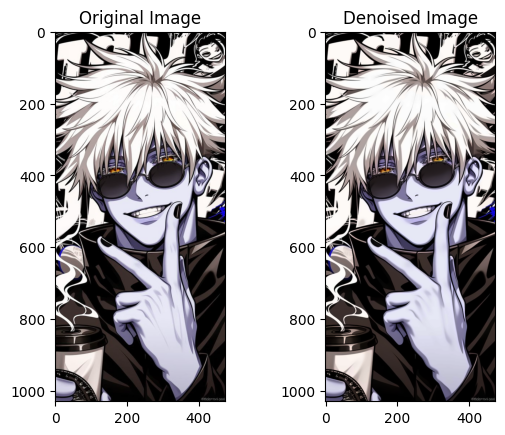

In [76]:
# Importing required libraries
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Reading the noisy image from file
img = cv2.imread(r'C:\Users\DELL\Desktop\web\Cute Wallpaper Hd 1080p.jpeg')

# Applying denoising filter
dst = cv2.fastNlMeansDenoisingColored(img, None, 10, 10, 7, 15)

# Displaying original and denoised images
plt.subplot(121), plt.imshow(img), plt.title('Original Image')
plt.subplot(122), plt.imshow(dst), plt.title('Denoised Image')
plt.show()

# 16:Filter Color with OpenCV

In [78]:
import cv2
import numpy as np

cap = cv2.VideoCapture(0)  # Start webcam

while True:
    _, frame = cap.read()
    
    # Convert BGR to HSV
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    # Define range for blue color in HSV
    lower_blue = np.array([60, 35, 140])
    upper_blue = np.array([180, 255, 255])

    # Create mask
    mask = cv2.inRange(hsv, lower_blue, upper_blue)
    
    # Filter the blue region
    result = cv2.bitwise_and(frame, frame, mask=mask)

    # Show frames
    cv2.imshow('Original Frame', frame)
    cv2.imshow('Blue Mask', mask)
    cv2.imshow('Blue Filtered Result', result)

    # Press 'q' to quit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break  # Exit the loop when 'q' is pressed

cap.release()
cv2.destroyAllWindows()
print("Exiting...")  # Confirm exit

Exiting...


# 17:Image Inpainting using OpenCV

In [81]:
import cv2
import numpy as np

# reading the damaged image
damaged_img = cv2.imread(filename=r"C:\Users\DELL\Desktop\web\Cute Wallpaper Hd 1080p.jpeg")

# get the shape of the image
height, width = damaged_img.shape[0], damaged_img.shape[1]

# Converting all pixels greater than zero to black while black becomes white
for i in range(height):
    for j in range(width):
        if damaged_img[i, j].sum() > 0:
            damaged_img[i, j] = 0
        else:
            damaged_img[i, j] = [255, 255, 255]

# saving the mask 
mask = damaged_img
cv2.imwrite('mask.jpg', mask)

# displaying mask
cv2.imshow("damaged image mask", mask)
cv2.waitKey(0)
cv2.destroyAllWindows()

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


# 18:Image Registration

In [86]:
import cv2
import numpy as np

# Open the image files.
img1_color = cv2.imread(r'C:\Users\DELL\Desktop\web\Cute Wallpaper Hd 1080p.jpeg')  # Image to be aligned.
img2_color = cv2.imread(r'C:\Users\DELL\Desktop\web\Cute Wallpaper Hd 1080p.jpeg')    # Reference image.

# Convert to grayscale.
img1 = cv2.cvtColor(img1_color, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2_color, cv2.COLOR_BGR2GRAY)
height, width = img2.shape

# Create ORB detector with 5000 features.
orb_detector = cv2.ORB_create(5000)

# Find keypoints and descriptors.
# The first arg is the image, second arg is the mask
#  (which is not required in this case).
kp1, d1 = orb_detector.detectAndCompute(img1, None)
kp2, d2 = orb_detector.detectAndCompute(img2, None)

# Match features between the two images.
# We create a Brute Force matcher with 
# Hamming distance as measurement mode.
matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)

# Match the two sets of descriptors.
matches = list(matcher.match(d1, d2))

# Sort matches on the basis of their Hamming distance.
matches.sort(key = lambda x: x.distance)

# Take the top 90 % matches forward.
matches = matches[:int(len(matches)*0.9)]
no_of_matches = len(matches)

# Define empty matrices of shape no_of_matches * 2.
p1 = np.zeros((no_of_matches, 2))
p2 = np.zeros((no_of_matches, 2))

for i in range(len(matches)):
  p1[i, :] = kp1[matches[i].queryIdx].pt
  p2[i, :] = kp2[matches[i].trainIdx].pt

# Find the homography matrix.
homography, mask = cv2.findHomography(p1, p2, cv2.RANSAC)

# Use this matrix to transform the
# colored image wrt the reference image.
transformed_img = cv2.warpPerspective(img1_color,
                    homography, (width, height))

# Save the output.
cv2.imwrite('output.jpg', transformed_img)

True

# 19:Line detection using Houghline method

In [89]:
# Python program to illustrate HoughLine
# method for line detection
import cv2
import numpy as np

# Reading the required image in
# which operations are to be done.
# Make sure that the image is in the same
# directory in which this python program is
img = cv2.imread(r'C:\Users\DELL\Desktop\web\Cute Wallpaper Hd 1080p.jpeg')

# Convert the img to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply edge detection method on the image
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

# This returns an array of r and theta values
lines = cv2.HoughLines(edges, 1, np.pi/180, 200)

# The below for loop runs till r and theta values
# are in the range of the 2d array
for r_theta in lines:
    arr = np.array(r_theta[0], dtype=np.float64)
    r, theta = arr
    # Stores the value of cos(theta) in a
    a = np.cos(theta)

    # Stores the value of sin(theta) in b
    b = np.sin(theta)

    # x0 stores the value rcos(theta)
    x0 = a*r

    # y0 stores the value rsin(theta)
    y0 = b*r

    # x1 stores the rounded off value of (rcos(theta)-1000sin(theta))
    x1 = int(x0 + 1000*(-b))

    # y1 stores the rounded off value of (rsin(theta)+1000cos(theta))
    y1 = int(y0 + 1000*(a))

    # x2 stores the rounded off value of (rcos(theta)+1000sin(theta))
    x2 = int(x0 - 1000*(-b))

    # y2 stores the rounded off value of (rsin(theta)-1000cos(theta))
    y2 = int(y0 - 1000*(a))

    # cv2.line draws a line in img from the point(x1,y1) to (x2,y2).
    # (0,0,255) denotes the colour of the line to be
    # drawn. In this case, it is red.
    cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)

# All the changes made in the input image are finally
# written on a new image houghlines.jpg
cv2.imwrite('linesDetected.jpg', img)

False

In [90]:
import cv2
import numpy as np

# Read image
image = cv2.imread(r'C:\Users\DELL\Desktop\web\Cute Wallpaper Hd 1080p.jpeg')

# Convert image to grayscale
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

# Use canny edge detection
edges = cv2.Canny(gray,50,150,apertureSize=3)

# Apply HoughLinesP method to 
# to directly obtain line end points
lines_list =[]
lines = cv2.HoughLinesP(
            edges, # Input edge image
            1, # Distance resolution in pixels
            np.pi/180, # Angle resolution in radians
            threshold=100, # Min number of votes for valid line
            minLineLength=5, # Min allowed length of line
            maxLineGap=10 # Max allowed gap between line for joining them
            )

# Iterate over points
for points in lines:
      # Extracted points nested in the list
    x1,y1,x2,y2=points[0]
    # Draw the lines joing the points
    # On the original image
    cv2.line(image,(x1,y1),(x2,y2),(0,255,0),2)
    # Maintain a simples lookup list for points
    lines_list.append([(x1,y1),(x2,y2)])
    
# Save the result image
cv2.imwrite('detectedLines.png',image)

False

# 20:Circle Detection

In [91]:
import cv2
import numpy as np

# Read image
img = cv2.imread(r'C:\Users\DELL\Desktop\web\Cute Wallpaper Hd 1080p.jpeg')
output = img.copy()
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Reduce noise
gray = cv2.medianBlur(gray, 5)

# Detect circles
circles = cv2.HoughCircles(
    gray,
    cv2.HOUGH_GRADIENT,
    dp=1,
    minDist=100,      
    param1=100,         
    param2=40,       
    minRadius=30,       
    maxRadius=60
)

# Draw only the first detected circle
if circles is not None:
    circles = np.uint16(np.around(circles))
    x, y, r = circles[0][0]
    cv2.circle(output, (x, y), r, (0, 255, 0), 2)  # Circle outline
    cv2.circle(output, (x, y), 2, (0, 0, 255), 3)  # Center point

# Show result
cv2.imshow('Detected Circle', output)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 21:Detect corner of an image

In [92]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [93]:
img = cv2.imread(r'C:\Users\DELL\Desktop\web\Cute Wallpaper Hd 1080p.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [94]:
corners = cv2.goodFeaturesToTrack(
    gray,
    maxCorners=27,
    qualityLevel=0.01,
    minDistance=10,
    blockSize=3,
    useHarrisDetector=False,
    k=0.04
)

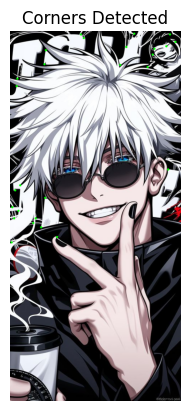

In [95]:
corners = np.intp(corners)  # Convert to integer coords
for corner in corners:
    x, y = corner.ravel()
    cv2.circle(img, (x, y), radius=3, color=(0, 255, 0), thickness=-1)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Corners Detected')
plt.axis('off')
plt.show()

# 22:Detect corner of an image

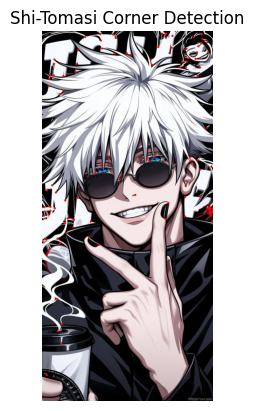

In [96]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread(r'C:\Users\DELL\Desktop\web\Cute Wallpaper Hd 1080p.jpeg')

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

corners = cv2.goodFeaturesToTrack(gray_img, 100, 0.01, 10)
corners = np.int32(corners)

for i in corners:
    x, y = i.ravel()
    cv2.circle(img, (x, y), 3, (0, 0, 255), -1)  

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.title('Shi-Tomasi Corner Detection')
plt.axis('off')  
plt.show()